# Task 2 - Diffusion Maps

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from helpers.data import get_unit_cycle_dataset, get_swiss_roll_dataset, get_trajectory_dataset
from helpers.plots import (
    plot_2d_dataset,
    plot_3d_dataset,
    plot_two_pedestrians,
    plot_pairwise_eigenvector,
    plot_2d_pca_plot,
    plot_3d_pca_plot,
)
from helpers.diffusion_maps import get_diffusion_map


## 1. Similarity of diffusion maps and fourier analysis

In the following, we take a look at a periodic data set with $N = 1000$ points given by:

$$ X = \{x_k \in \mathbb{R}^2\}_{k=1}^{N},\; x_k = (cos(t_k), sin(t_k)),\; t_k = (2 \pi k) / (N + 1)$$

### 1.1 Get the circular dataset and inspect it

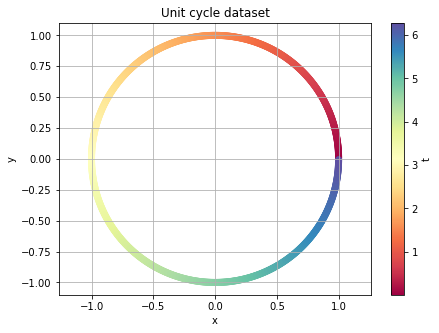

In [2]:
X_unit_cycle, t_unit_cycle, color_unit_cycle = get_unit_cycle_dataset(N=1000)  # shape (1000, 2)
fig, _ = plot_2d_dataset(
    X_unit_cycle[:, 0],
    X_unit_cycle[:, 1],
    x_label="x",
    y_label="y",
    axis_equal=True,
    title="Unit cycle dataset",
    c=t_unit_cycle,
    colorbar=True,
    colorbar_label="t",
)
fig.savefig("plots/unit_cycle_dataset.pdf", bbox_inches='tight')


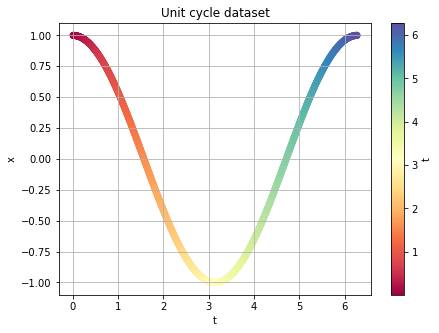

In [3]:
fig, _ = plot_2d_dataset(
    t_unit_cycle,
    X_unit_cycle[:, 0],
    x_label="t",
    y_label="x",
    title="Unit cycle dataset",
    c=t_unit_cycle,
    colorbar=True,
    colorbar_label="t",
)
fig.savefig("plots/unit_cycle_dataset_x.pdf", bbox_inches='tight')

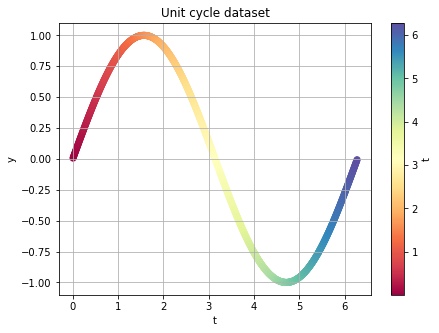

In [4]:
fig, _ = plot_2d_dataset(
    t_unit_cycle,
    X_unit_cycle[:, 1],
    x_label="t",
    y_label="y",
    title="Unit cycle dataset",
    c=t_unit_cycle,
    colorbar=True,
    colorbar_label="t",
)
fig.savefig("plots/unit_cycle_dataset_y.pdf", bbox_inches='tight')


### 1.2 Calculate eigenvalues and eigenvectors of diffusion map

In [5]:
eig_val_circular, eig_vec_circular = get_diffusion_map(X_unit_cycle, L=4) # shape (5, 2)


### 1.3 Plot eigenvectors against t

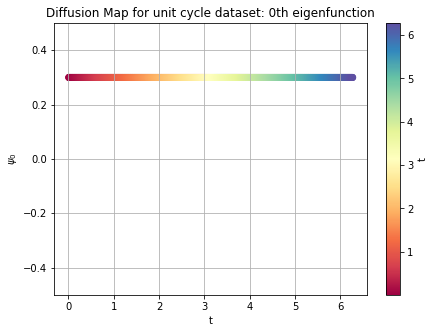

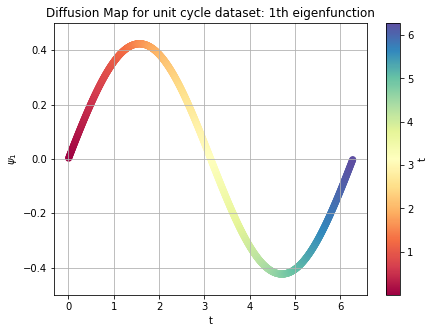

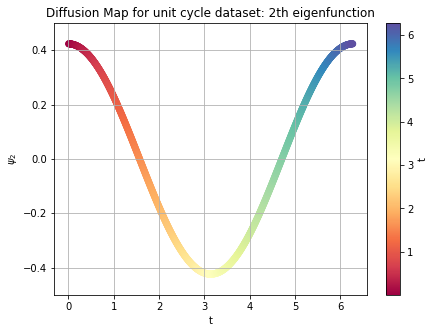

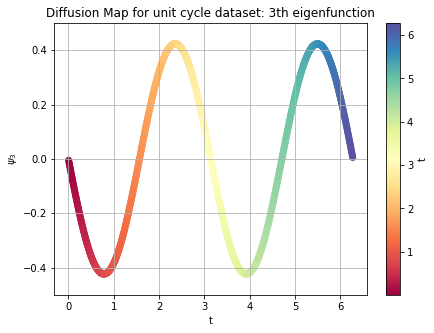

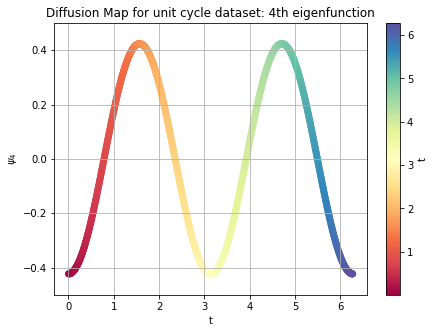

In [6]:
l_vec = list(range(0, eig_vec_circular.shape[1]))
for i, l in enumerate(l_vec):
    fig, _ = plot_2d_dataset(
        t_unit_cycle,
        eig_vec_circular[:, l],
        x_label="t",
        y_label=r"$\psi_{}$".format(i),
        title=f"Diffusion Map for unit cycle dataset: {l}th eigenfunction",
        c=t_unit_cycle,
        colorbar=True,
        colorbar_label="t",
        ylim=(-0.5, 0.5),
    )
    fig.savefig(f"plots/unit_cycle_diffusion_map_{l}.pdf", bbox_inches='tight')


### 1.4 Bonus: Explain relation between results above to the concept of a fourier analysis of the "signal" X 

When performing a fourier analysis on a signal X, we are trying to decompose our signal as sums of sine and cosine
waves. One can also see this decomposition in the plots of the evaluated eigenfunctions above. The plot of t against the first and second evaluated eigenfunction shows the sine and cosine wave (=fundamental osciallation), the graph below shows the first harmonics.

## 2. Eigenfunctions on "Swiss roll" manifold

In the following, we consider the so called "swiss roll" dataset, defined through:

$$ X = \{x_k \in \mathbb{R}^3\}_{k=1}^N ,\; x_k = (ucos(u), v, usin(u)),  $$

where $(u, v) \in [0,10]^2$ are chosen uniformly at random.

### 2.1 Get the data and inspect it

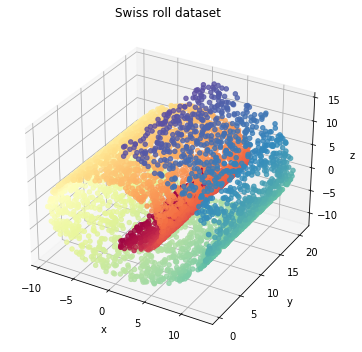

In [7]:
N = 5000
N_PLOT = 1000

X_swiss, color_swiss = get_swiss_roll_dataset(N=N)  # shape (5000, 3)

# reduce number of displayed data points for plots
idx_plot = np.random.permutation(X_swiss.shape[0])[0:N_PLOT]  # shape (1000, 3)
X_swiss_reduced = X_swiss[idx_plot, :]
color_swiss_reduced = color_swiss[idx_plot]

# show full data
fig, _ = plot_3d_dataset(
    X_swiss[:, 0],
    X_swiss[:, 1],
    X_swiss[:, 2],
    x_label="x",
    y_label="y",
    z_label="z",
    title="Swiss roll dataset",
    c=color_swiss,
    alpha=0.8,
)
fig.savefig("plots/swiss_roll_dataset.pdf", bbox_inches='tight')


### 2.2 Calculate eigenvalues and eigenvectors of diffusion map

In [8]:
eig_val_swiss, eig_vec_swiss = get_diffusion_map(X_swiss, L=9)  # shapes (10,); (5000, 10)


### 2.3 Plot first non-constant eigenfunction against the other ones

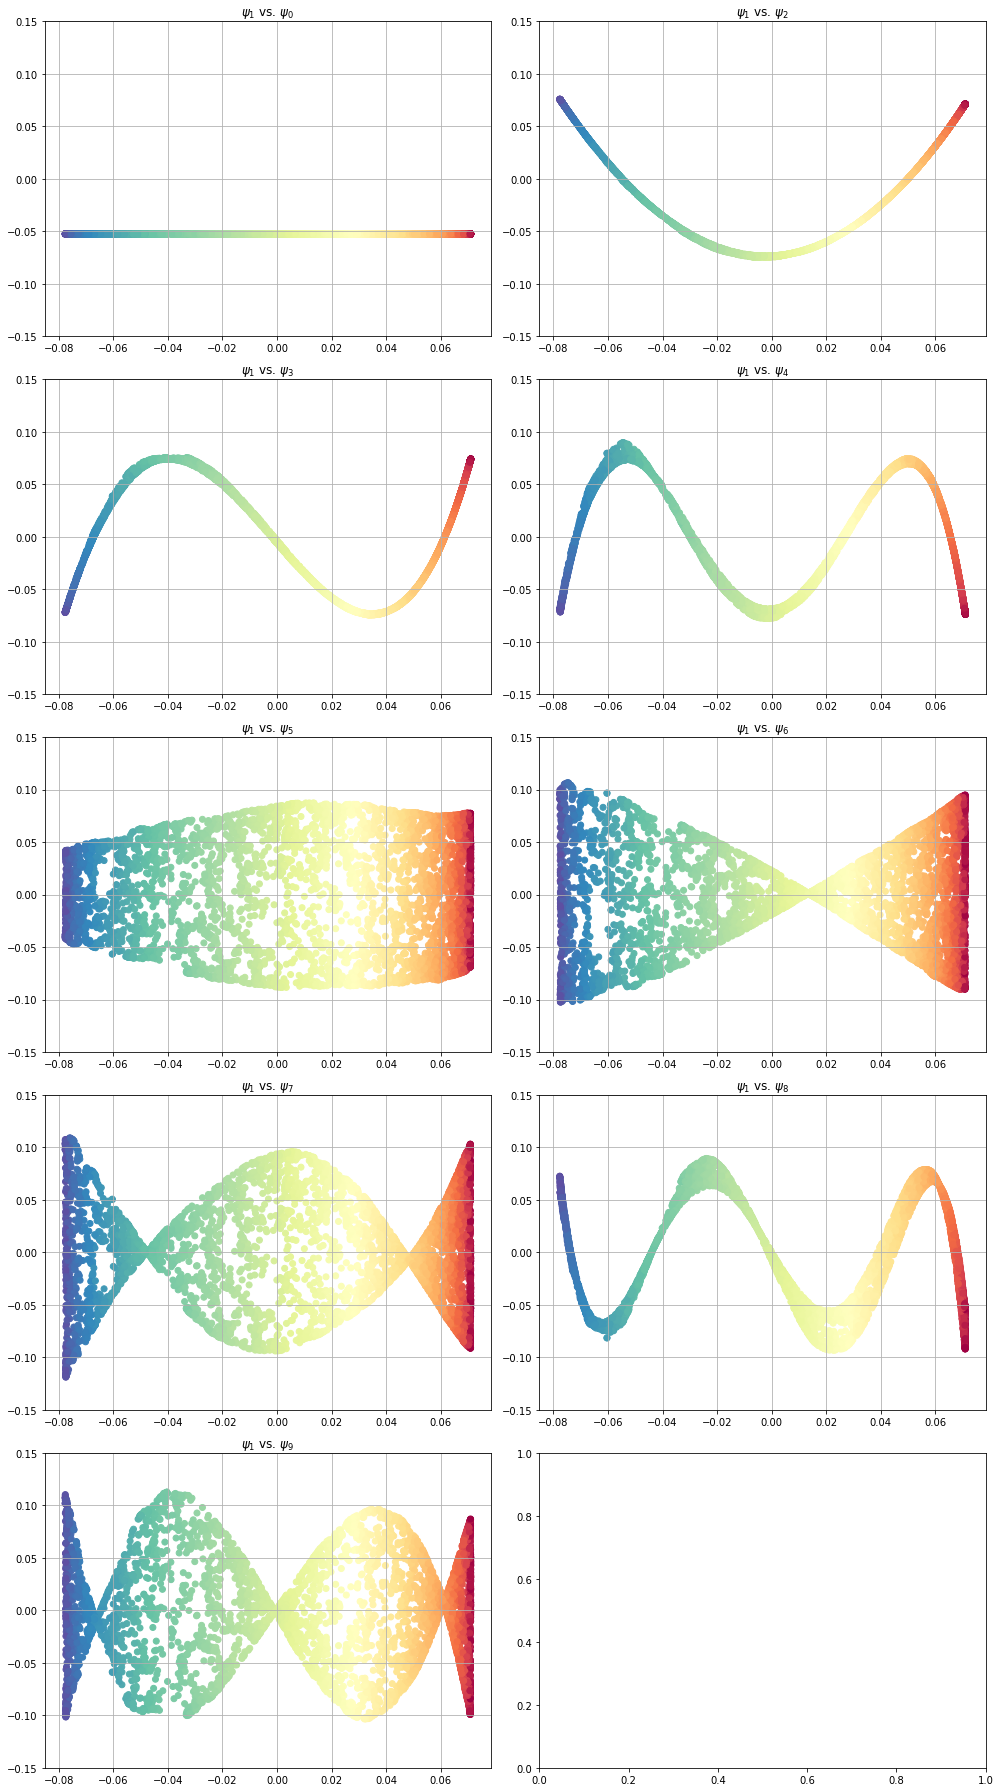

In [9]:
plot_pairwise_eigenvector(
    eig_vec_swiss, c=color_swiss, ylim=[-0.15, 0.15], save_path="plots/swiss_roll_diffusion_map.pdf"
)


### 2.4 Compute first three principal components of the swiss roll dataset

In [10]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
X_swiss_transformed = pca.fit_transform(X_swiss)
X_swiss_transformed_reduced = X_swiss_transformed[idx_plot, :]


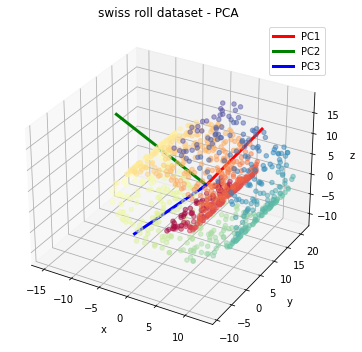

In [11]:
plot_3d_pca_plot(
    X_swiss_reduced,
    pca.components_,
    "x",
    "y",
    "z",
    "swiss roll dataset - PCA",
    save_path="plots/swiss_roll_pca.pdf",
    c=color_swiss_reduced,
    alpha=0.5,
)


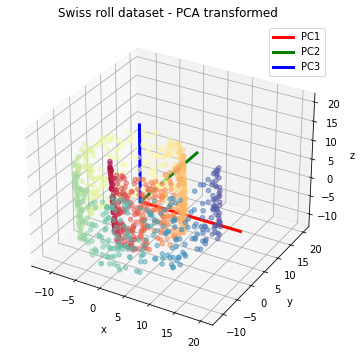

In [12]:
plot_3d_pca_plot(
    X_swiss_transformed_reduced,
    np.diag(np.ones(3)),
    "x",
    "y",
    "z",
    "Swiss roll dataset - PCA transformed",
    save_path="plots/swiss_roll_pca_transformed.pdf",
    add_mean_to_axis=False,
    alpha=0.5,
    c=color_swiss_reduced,
)


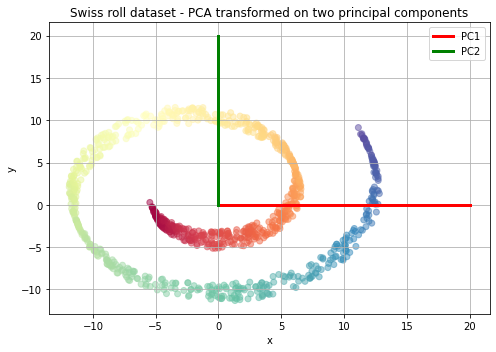

In [13]:
plot_2d_pca_plot(
    X_swiss_transformed_reduced,
    np.diag(np.ones(2)),
    "x",
    "y",
    "Swiss roll dataset - PCA transformed on two principal components",
    add_mean_to_axis=False,
    save_path="plots/swiss_roll_pca_transformed_2d.pdf",
    alpha=0.5,
    c=color_swiss_reduced,
)


## 2.5 Why is it impossible to only use the first two principle components?

Because then, the information about the depth (= original y-axis) would get lost. This then would no longer allow for
going back to the old representation.

## 3. Vadere trajectory data

### 3.1 Get the data and inspect it

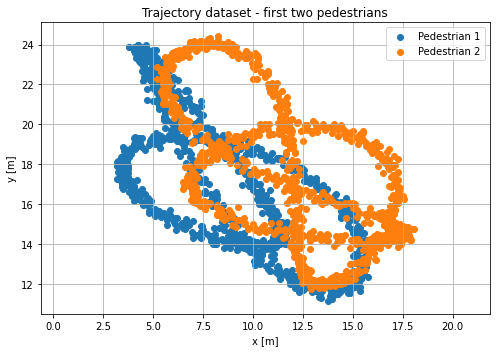

In [14]:
X_trajectory = get_trajectory_dataset()  # shape = (1000, 30)
plot_two_pedestrians(
    X_trajectory, x_label="x [m]", y_label="y [m]", title="Trajectory dataset - first two pedestrians", save_path="plots/trajectory_dataset.pdf"
)


### 3.2 Apply the difussion map algorithm and plot the projections

In [15]:
eig_val_traj, eig_vec_traj = get_diffusion_map(X_trajectory, L=10)


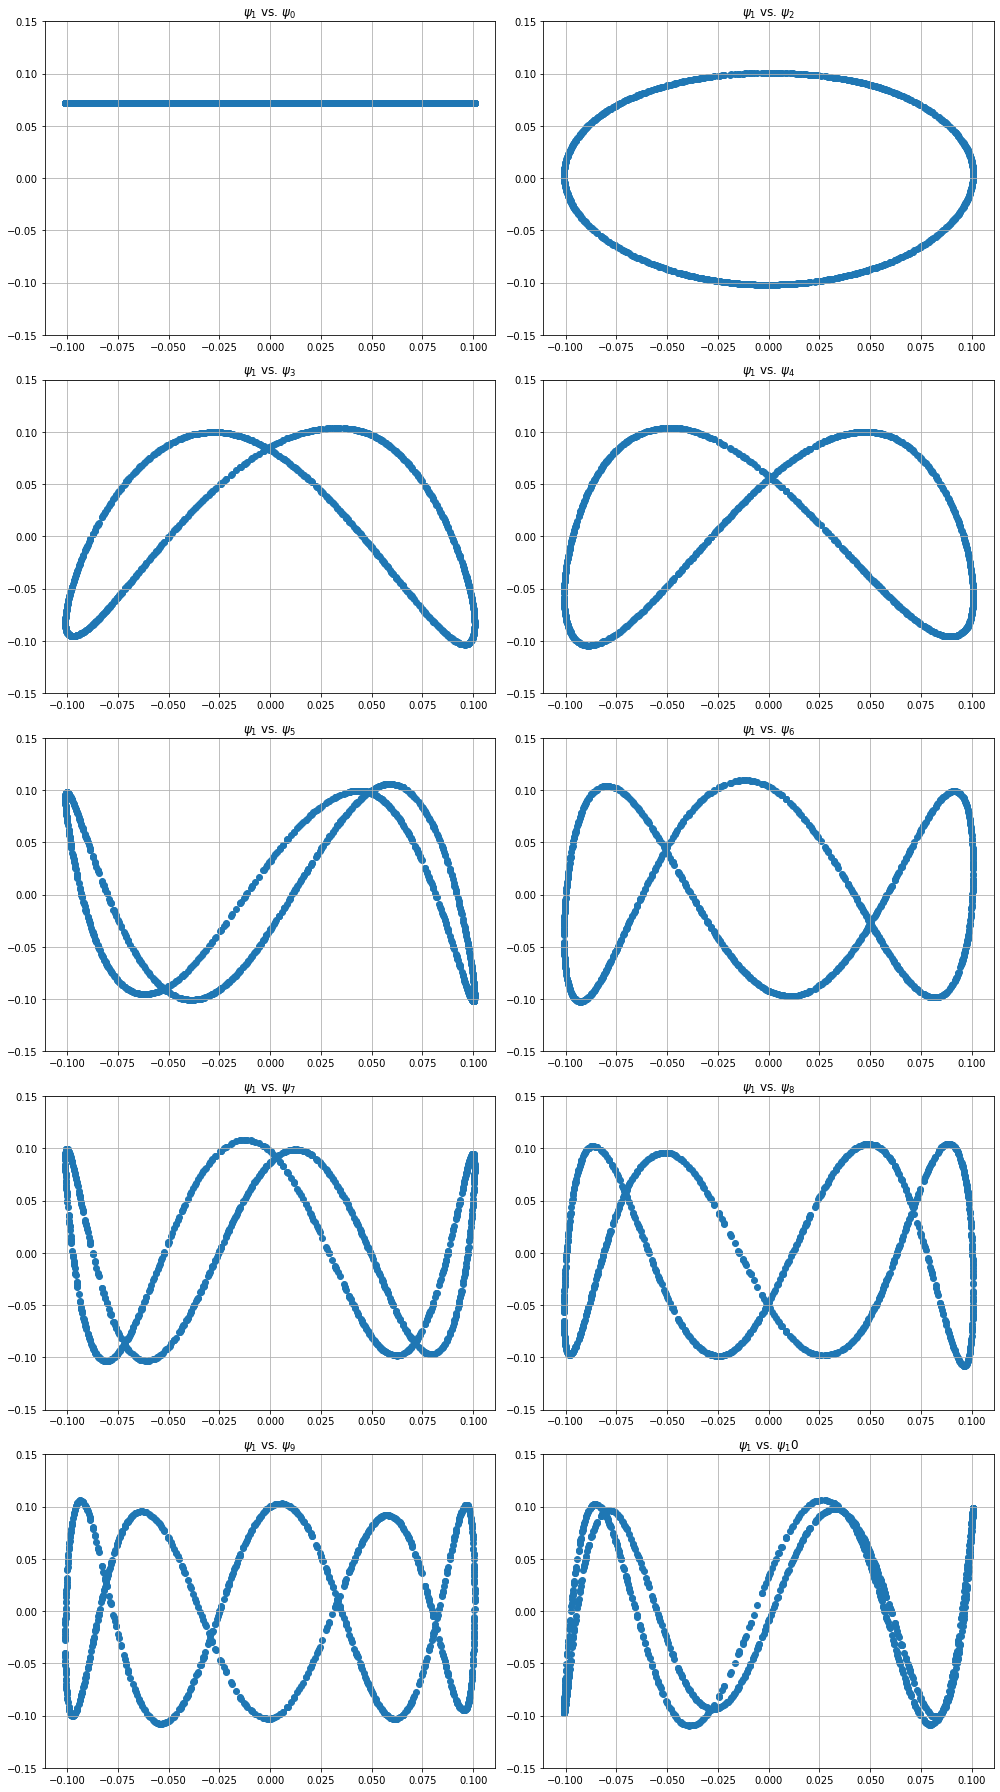

In [16]:
plot_pairwise_eigenvector(eig_vec_traj, ylim=[-0.15, 0.15], save_path="plots/trajectory_diffusion_map.pdf")


As one can see, two eigenfunctions are enough to accurately represent the data.

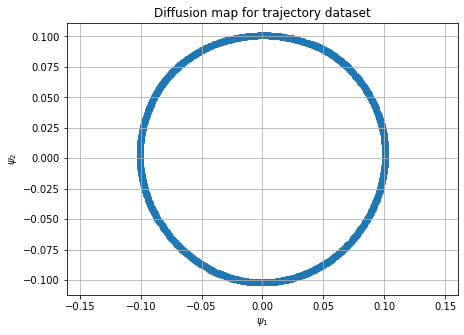

In [17]:
_ = plot_2d_dataset(
    eig_vec_traj[:, 1],
    eig_vec_traj[:, 2],
    axis_equal=True,
    x_label=r"$\psi_{1}$",
    y_label=r"$\psi_{2}$",
    title="Diffusion map for trajectory dataset",
)


## 4. Bonus: Datafold

Example adapted from https://datafold-dev.gitlab.io/datafold/tutorial_03_basic_dmap_scurve.html.

In [22]:
import datafold.dynfold as dfold
import datafold.pcfold as pfold
import matplotlib.pyplot as plt
import numpy as np

from helpers.plots import (
    plot_pairwise_eigenvector,
)


### 4.1 Get swiss roll dataset

In [19]:
N = 5000
X_swiss_datafold, color_swiss_datafold = get_swiss_roll_dataset(N=N)

nr_samples_plot = 1000
idx_plot = np.random.permutation(N)[0:nr_samples_plot]


### 4.2 Fit diffusion map and calculate projected data

In [23]:
X_pcm = pfold.PCManifold(X_swiss_datafold)
X_pcm.optimize_parameters()

dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_


### 4.3 Plot the evaluated eigenfunctions against each other

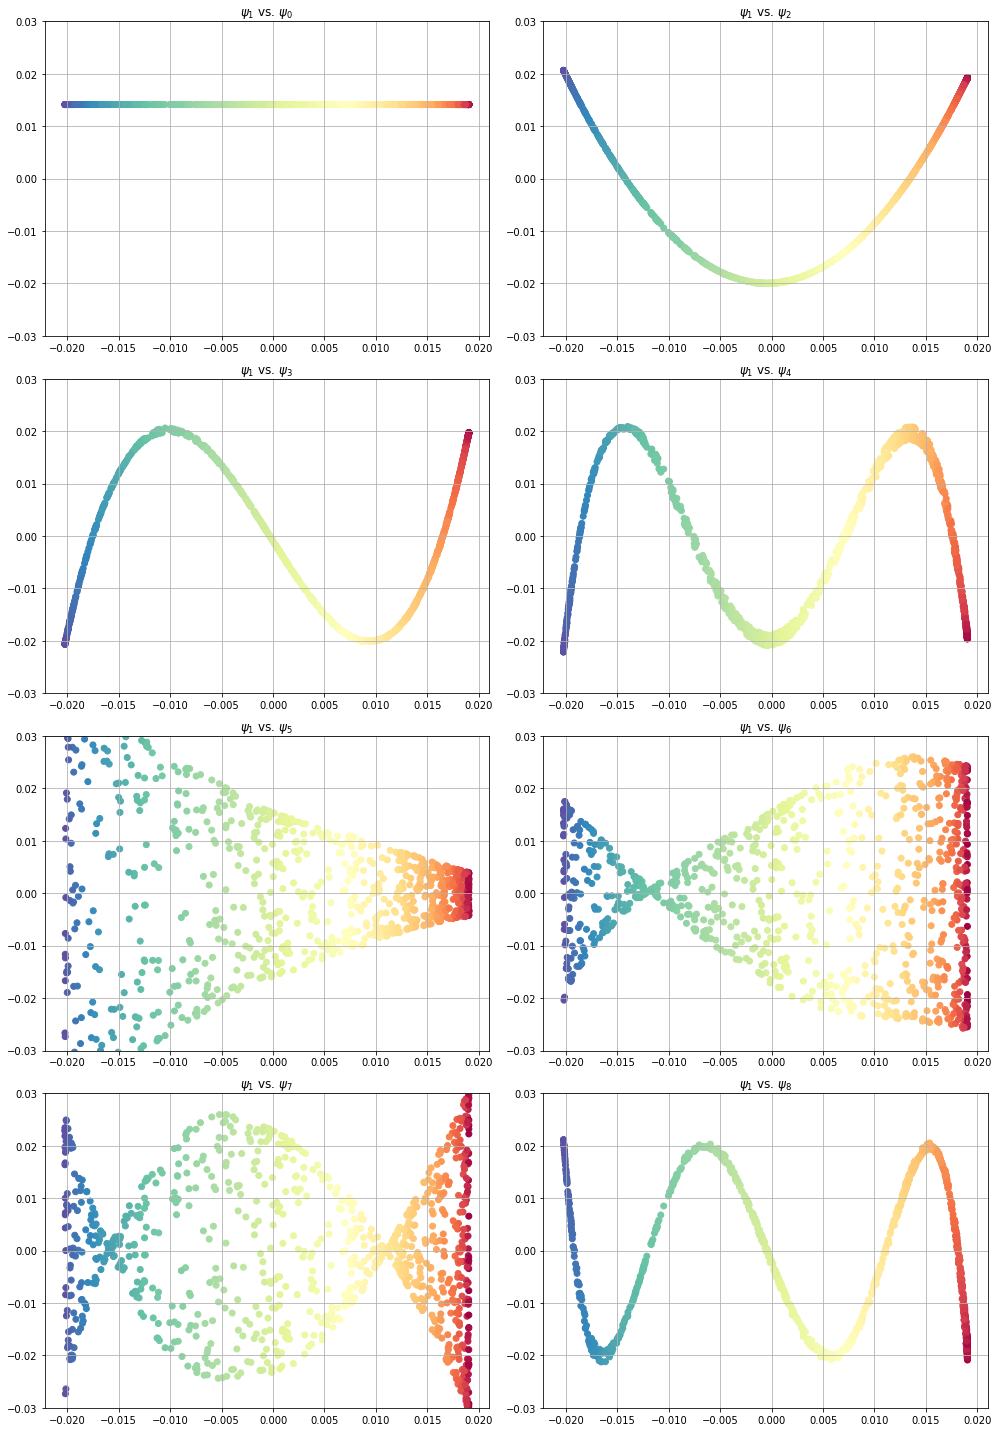

In [21]:
plot_pairwise_eigenvector(
    dmap.eigenvectors_[idx_plot, :],
    c=color_swiss_datafold[idx_plot],
    ylim=[-0.03, 0.03],
    save_path="plots/swiss_roll_diffusion_map_datafold.pdf",
)

### 4.4 Findings

One can see that the results of the datafold library are topologically equivalent to the own implementation.